In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


In [13]:
file_path = r"D:\Shreya DA Projects\Wine Quality Prediction [L2] P6\WineQT.csv"
df = pd.read_csv(file_path)

print(" Dataset Loaded Successfully")
print(df.head())


 Dataset Loaded Successfully
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

In [14]:
#DATASET OVERVIEW
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Statistical Summary:
       fixed acidity  volatile acidity

In [15]:
# TARGET VARIABLE TRANSFORMATION
# Convert quality to binary:
# 1 → Good wine (quality >= 7)
# 0 → Bad wine (quality < 7)
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

print("\nQuality Label Distribution:")
print(df['quality_label'].value_counts())


Quality Label Distribution:
quality_label
0    984
1    159
Name: count, dtype: int64


In [16]:
#FEATURE & TARGET SPLIT
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

In [17]:
#TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [18]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("\n📊 Model Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


📊 Model Performance
Accuracy : 0.9213973799126638
Precision: 0.7692307692307693
Recall   : 0.625
F1 Score : 0.6896551724137931

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229



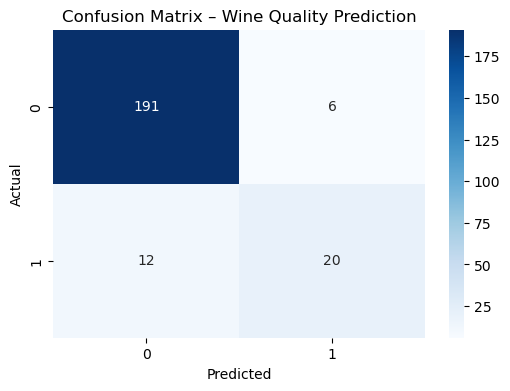

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Wine Quality Prediction")
plt.show()